In [1]:
import pandas as pd

In [2]:
df_cholesterol = pd.read_csv('./datasets/cholesterol_dataset.csv')
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [3]:
df_cholesterol.drop(columns=['Id'], axis=1, inplace=True)

In [4]:
df_cholesterol.columns = [
  'grupo_sanguineo',
  'fumante',
  'nivel_atividade_fisica',
  'idade',
  'peso',
  'altura',
  'colesterol'
]

In [5]:
# EDA copy of dataset
df_cholesterol_eda = df_cholesterol.copy()
# Bucketing copy of dataset
df_cholesterol_bucketing = df_cholesterol.copy()

In [6]:
# Verify if there is any empty value
df_cholesterol.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
colesterol                0
dtype: int64

In [7]:
# Verify is should use median or avg in each column
df_cholesterol.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [8]:
# According to analysis, median should be better. idade, peso and altura are going to be used as integer, so fill
# values with float numbers should look strange. Besides it, median is more robust to outliers.
median_idade = df_cholesterol_eda['idade'].median()
median_peso = df_cholesterol_eda['peso'].median()
median_altura = df_cholesterol_eda['altura'].median()
mode_grupo_sanguineo = df_cholesterol_eda['grupo_sanguineo'].mode()[0]
mode_fumante = df_cholesterol_eda['fumante'].mode()[0]
mode_nivel_atividade_fisica = df_cholesterol_eda['nivel_atividade_fisica'].mode()[0]

In [9]:
df_cholesterol_eda.fillna(value={
  'idade': median_idade,
  'peso': median_peso,
  'altura': median_altura,
  'grupo_sanguineo': mode_grupo_sanguineo,
  'fumante': mode_fumante,
  'nivel_atividade_fisica': mode_nivel_atividade_fisica
}, inplace=True)

In [10]:
df_cholesterol_eda.idade = df_cholesterol_eda.idade.astype(int)
df_cholesterol_eda.peso = df_cholesterol_eda.peso.astype(int)
df_cholesterol_eda.altura = df_cholesterol_eda.altura.astype(int)

In [11]:
import seaborn as sns

<Axes: xlabel='idade'>

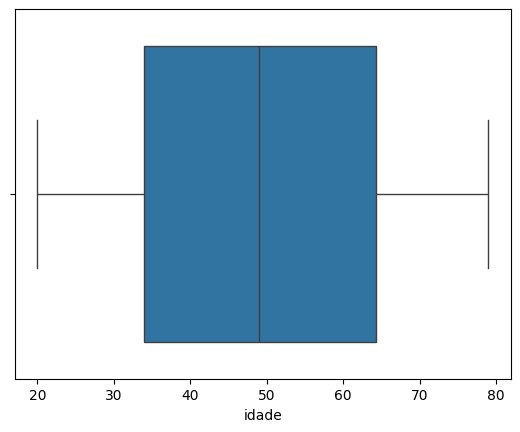

In [12]:
sns.boxplot(data=df_cholesterol_eda, x='idade') # OK, no outliers

<Axes: xlabel='peso'>

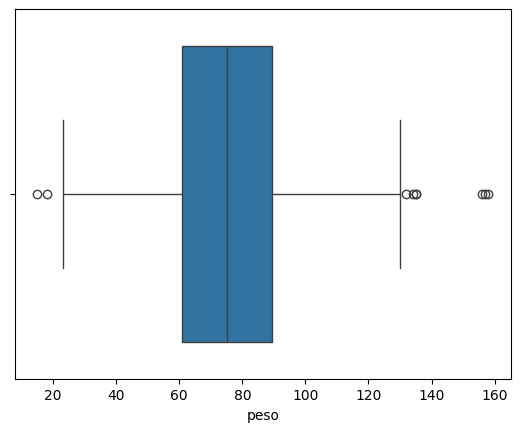

In [13]:
sns.boxplot(data=df_cholesterol_eda, x='peso')

In [14]:
# Have outliers. Outliers greater than normal are OK, but 20kg as an adult must be and error
# So, let's remove it
df_cholesterol_eda.drop(df_cholesterol_eda[df_cholesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

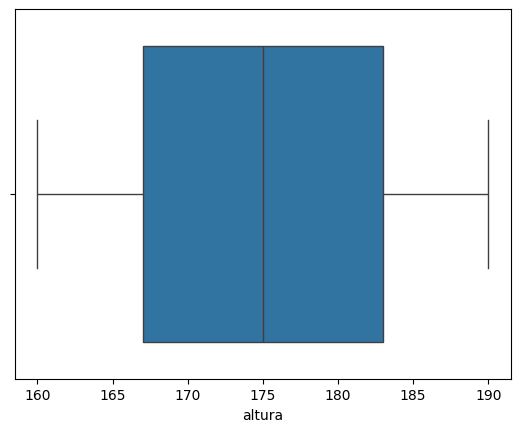

In [15]:
sns.boxplot(data=df_cholesterol_eda, x='altura') # OK, no outliers

<Axes: xlabel='grupo_sanguineo', ylabel='colesterol'>

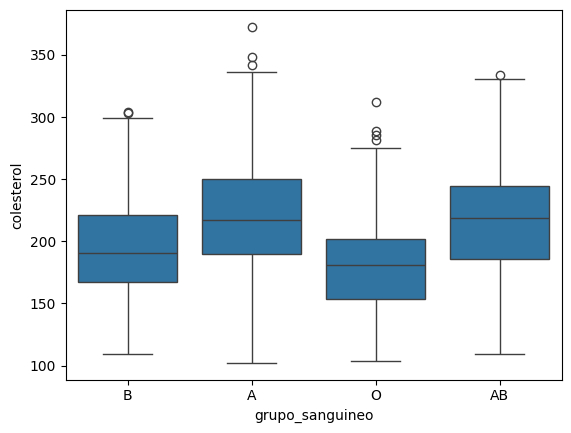

In [16]:
# verify if categorical data has influence in dependent variable
sns.boxplot(data=df_cholesterol_eda, x='grupo_sanguineo', y='colesterol')

<Axes: xlabel='fumante', ylabel='colesterol'>

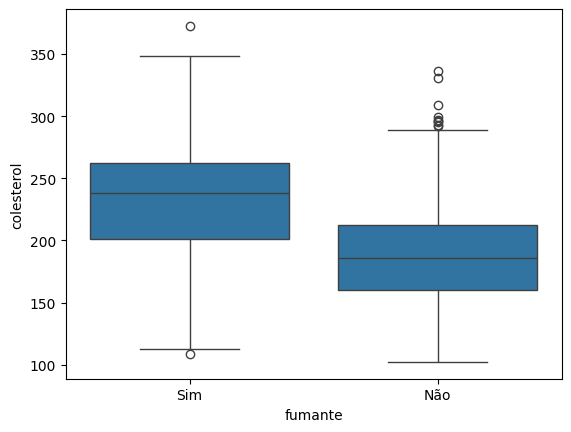

In [17]:
sns.boxplot(data=df_cholesterol_eda, x='fumante', y='colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='colesterol'>

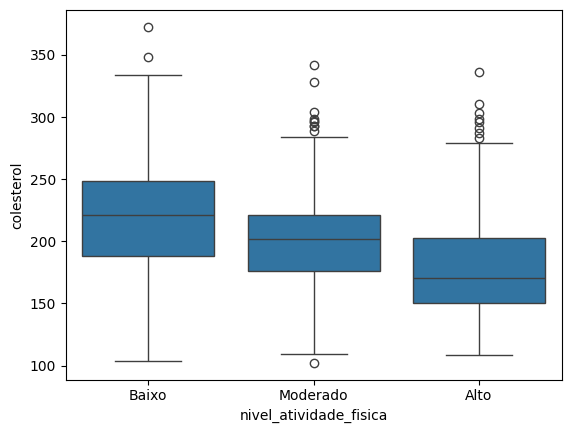

In [18]:
sns.boxplot(data=df_cholesterol_eda, x='nivel_atividade_fisica', y='colesterol')

<Axes: xlabel='altura', ylabel='colesterol'>

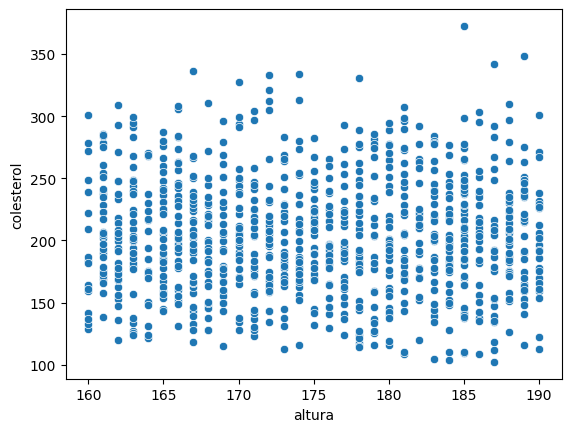

In [19]:
sns.scatterplot(data=df_cholesterol_eda, x='altura', y='colesterol') # no direct correlation

<Axes: xlabel='idade', ylabel='colesterol'>

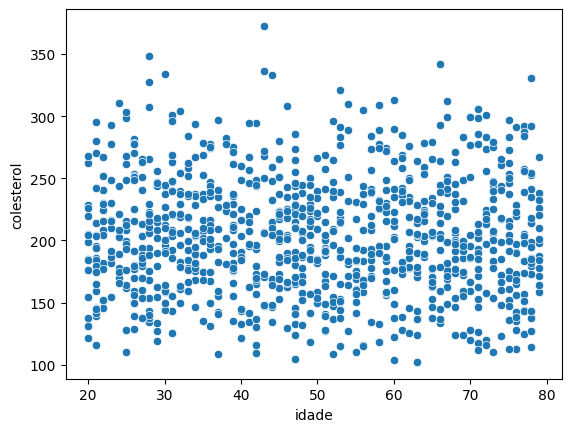

In [20]:
sns.scatterplot(data=df_cholesterol_eda, x='idade', y='colesterol') # no direct correlation

<Axes: xlabel='peso', ylabel='colesterol'>

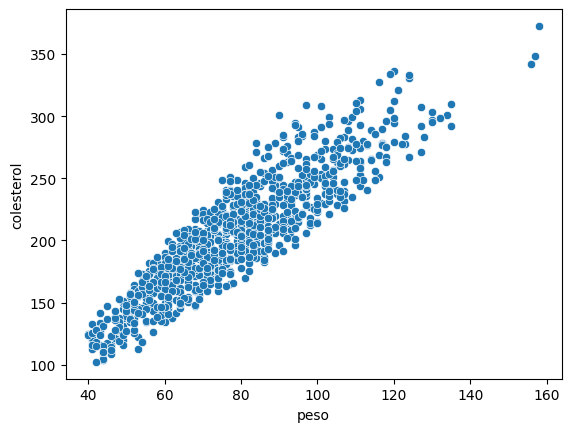

In [21]:
sns.scatterplot(data=df_cholesterol_eda, x='peso', y='colesterol') # Has a good correlation

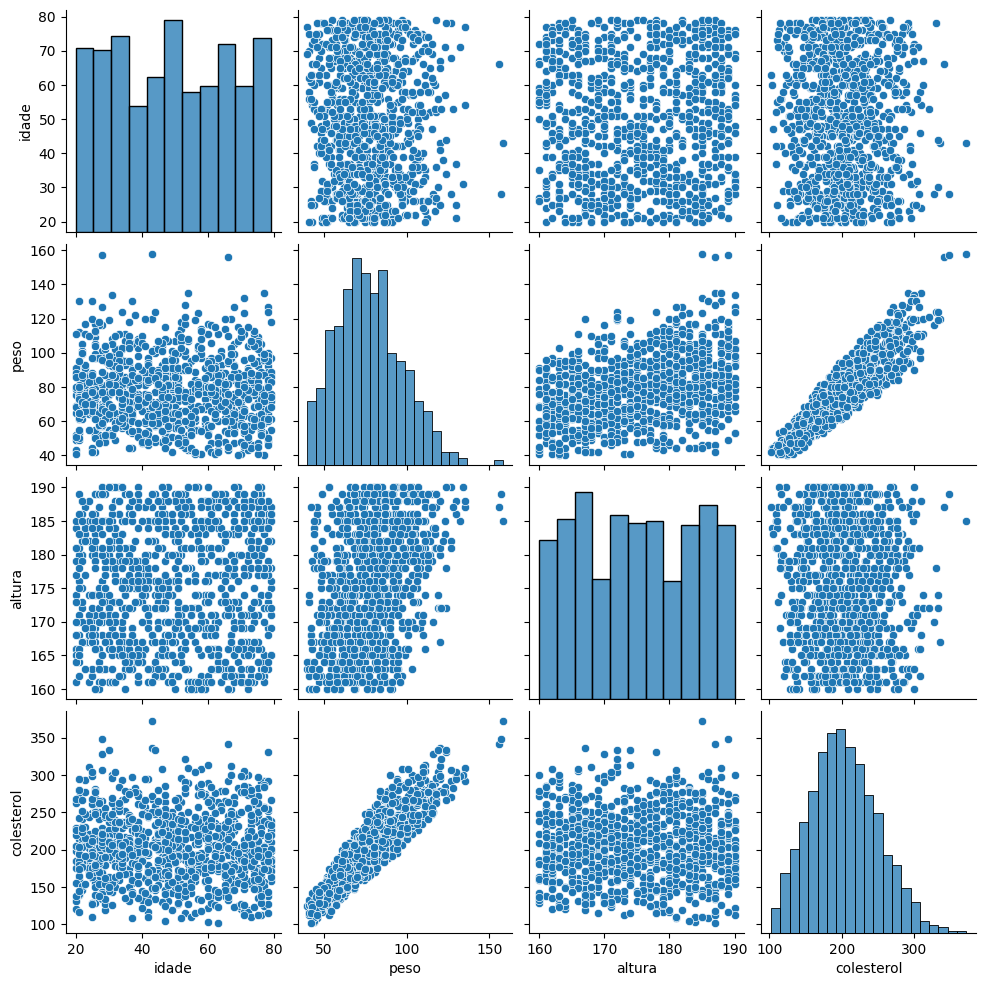

In [22]:
sns.pairplot(df_cholesterol_eda)

In [23]:
df_cholesterol_eda = pd.get_dummies(df_cholesterol_eda, columns=['fumante', 'grupo_sanguineo'], dtype='int64')

In [24]:
df_cholesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_cholesterol_eda['nivel_atividade_fisica'])[0] + 1

In [25]:
import matplotlib.pyplot as plt

<Axes: >

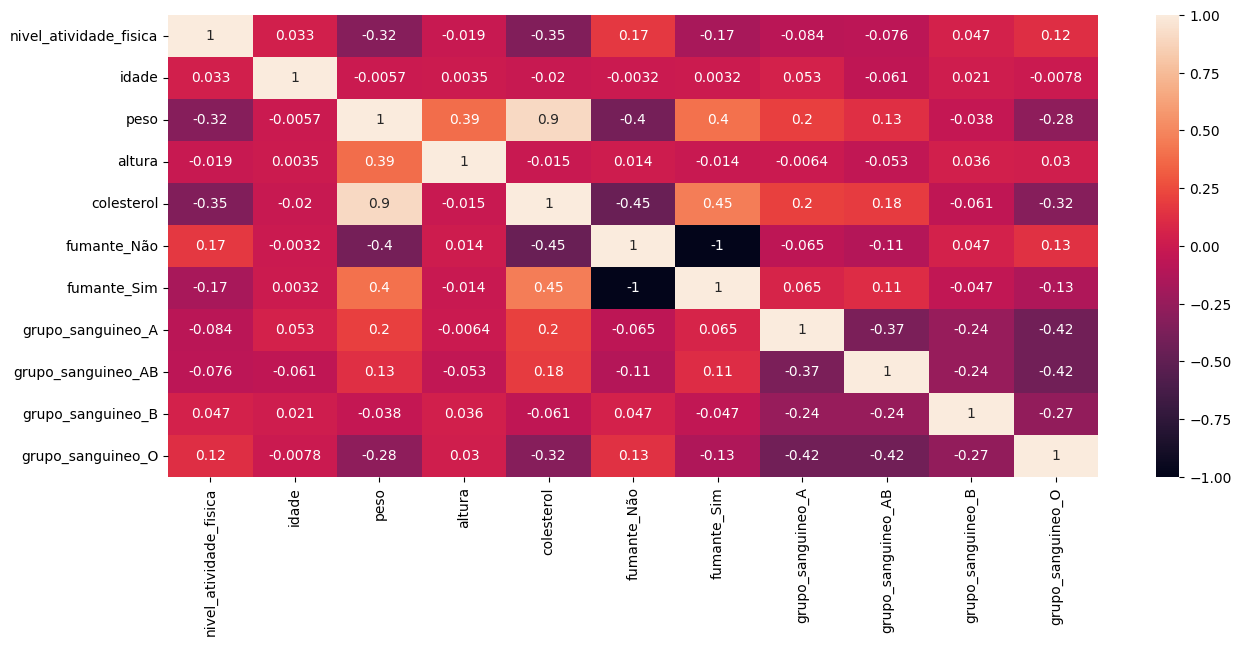

In [26]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_cholesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

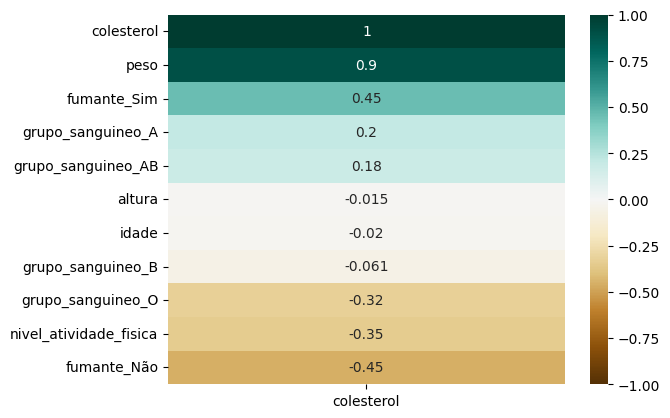

In [27]:
sns.heatmap(df_cholesterol_eda.corr()[['colesterol']].sort_values(by='colesterol', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [28]:
# Bucketing of variable "idade"
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

df_cholesterol_bucketing['escala_de_idade'] = pd.cut(x = df_cholesterol_bucketing['idade'], bins=age_bins, labels=age_labels, include_lowest=True)


<Axes: xlabel='escala_de_idade', ylabel='colesterol'>

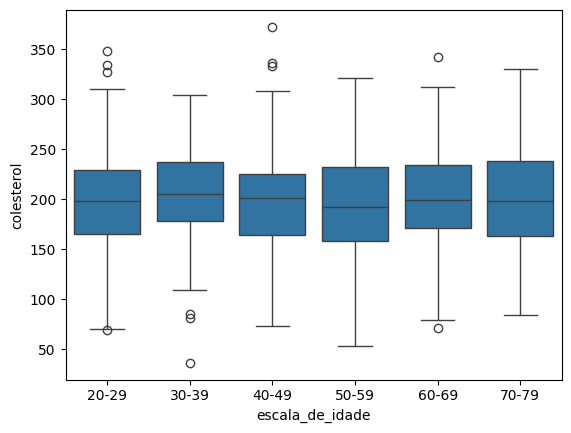

In [29]:
sns.boxplot(df_cholesterol_bucketing, x='escala_de_idade', y='colesterol')

In [30]:
# Training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # fill values in NA of dataset
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [31]:
# Drop outliers
df_cholesterol.drop(df_cholesterol[df_cholesterol['peso'] < 40].index, axis=0, inplace=True)


In [32]:
X = df_cholesterol.drop(columns=['colesterol'], axis=1)
y = df_cholesterol['colesterol']

In [33]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)
X_train.shape

(674, 6)

In [34]:
# Pipeline
# 1. Input mode in categoric variables missing in model (na) - grupo_sanguineo, fumante, nivel_atividade_fisica
# 2. OneHotEncoder in nominal categoric variables - grupo_sanguineo, fumante
# 3. OrdinalEncoder in ordinal categoric variables - nivel_atividade_fisica
# 4. Input median in missing numeric variables (na) - idade, altura, peso
# 5. Standardize numeric variables (avg / standard deviation) - idade, altura, peso

numeric_features = ['idade', 'altura', 'peso']
nominal_features = ['grupo_sanguineo', 'fumante']
ordinal_features = ['nivel_atividade_fisica']

In [35]:
transformer_nominal = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

transformer_ordinal = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

transformer_numerical = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler())
])

In [36]:
preprocessor = ColumnTransformer(
  transformers=[
    ('num', transformer_numerical, numeric_features),
    ('nom', transformer_nominal, nominal_features),
    ('ord', transformer_ordinal, ordinal_features),
  ]
)

In [37]:
model_reg = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('regressor', LinearRegression())
])

model_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'altura', 'peso']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica'])])),
                ('regressor', LinearRegression())])

In [38]:
# Predicting
y_pred = model_reg.predict(X_test)

In [39]:
# R2_Score
r2_score(y_test, y_pred)

0.9594250724093464

In [40]:
# Mean Abs Error
mean_absolute_error(y_test, y_pred)

7.313838031022505

In [41]:
# Root Mean Squared Error
mean_squared_error(y_test, y_pred, squared=False)

9.097649246487032

In [42]:
residues = y_test - y_pred

In [43]:
from scipy.stats import zscore

residues_std = zscore(residues)

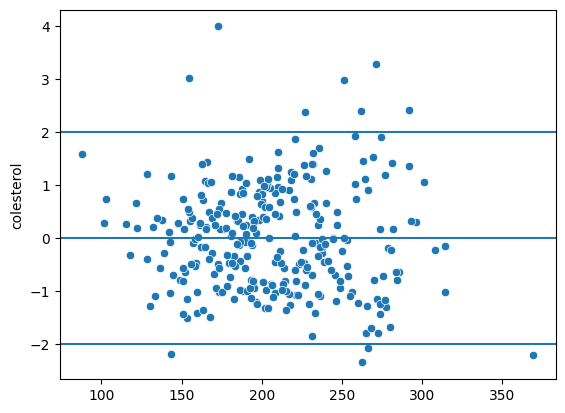

In [44]:
sns.scatterplot(x=y_pred, y=residues_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

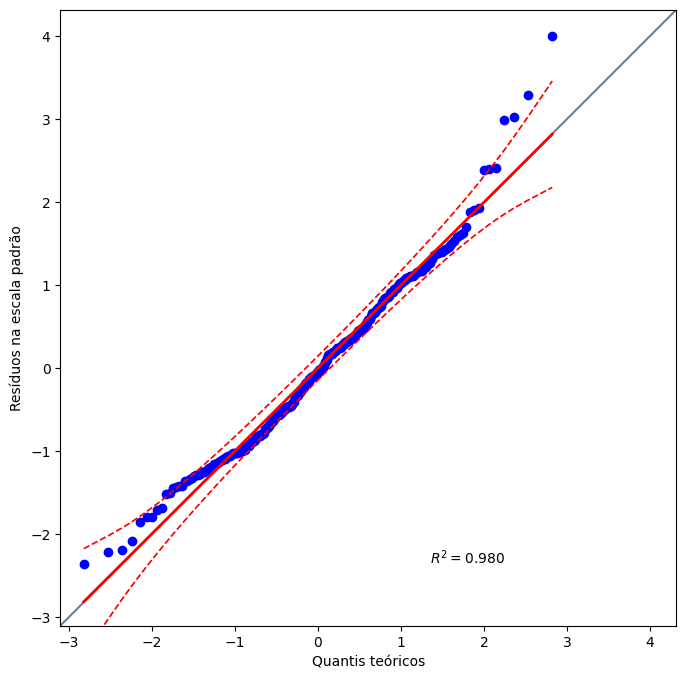

In [45]:
import pingouin as pg

plt.figure(figsize=(14,8))
pg.qqplot(residues_std, dist='norm')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Residues in standard deviation')
plt.show()

In [46]:
# Residues normality test
from scipy.stats import shapiro, kstest, anderson

In [48]:
# Shapiro-Wilk
stat_shapiro, pvalue_shapiro = shapiro(residues)
print("Test Statistics: {} and P-Value: {}".format(stat_shapiro, pvalue_shapiro))

Test Statistics: 0.9807736277580261 e P-Value: 0.000626839988399297


In [49]:
# Kolmogorov-Smirnov
stat_ks, pvalue_ks = kstest(residues, 'norm')
print("Test Statistics: {} and P-Value: {}".format(stat_ks, pvalue_ks))

Test Statistics: 0.42455920998485613 e P-Value: 8.925833190910163e-48


In [50]:
# Anderson-Darling
stat_and, critical_and, significance_and = anderson(residues, 'norm')
print("Test Statistics: {} and Critical Values: {}".format(stat_and, critical_and[2]))

Test Statistics: 0.9169275158490109 and Critical Values: 0.776


In [51]:
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [52]:
stat_ll, pvalue_ll = lilliefors(residues, 'norm', pvalmethod='table')
print("Test Statistics: {} and P-Value: {}".format(stat_ll, pvalue_ll))

Test Statistics: 0.04955371030192918 e P-Value: 0.12533323720735734


In [54]:
# Homocestasticity test. Have to transform X_test with the same processor used do train model
pipe = Pipeline(steps=[("preprocessor", preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

# Goldfeld-Quandt
test_goldfeld = het_goldfeldquandt(residues, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
pvalue_goldfeld = test_goldfeld[1]
print("Test Statistics: {} and P-Value: {}".format(stat_goldfeld, pvalue_goldfeld))

Test Statistics: 0.671613576525354 and P-Value: 0.9893959472385482
